# [CARLA COCO Object Detection Dataset](https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset)

## Imports

In [1]:
import os
import json
from datetime import datetime
import random
import xml.etree.ElementTree as ET
import PIL
from PIL import Image
from IPython.display import display

## Visualising Images

In [2]:
cwd = os.getcwd()

train_images = os.listdir("./images/train")
train_labels = os.listdir("./labels/train")

idx = 0
train_image_path = os.path.join(cwd, "images", "train", train_images[idx])
train_label_path = os.path.join(cwd, "labels", "train", train_labels[idx])

print(f"Number of training labels: {len(train_labels)}")
print(f"Number of training images: {len(train_images)}")
print()
print(f"Example of training label name: {train_labels[idx]}")
print(f"Example of training image name: {train_images[idx]}")

Number of training labels: 779
Number of training images: 779

Example of training label name: Town01_001020.xml
Example of training image name: Town01_001020.png


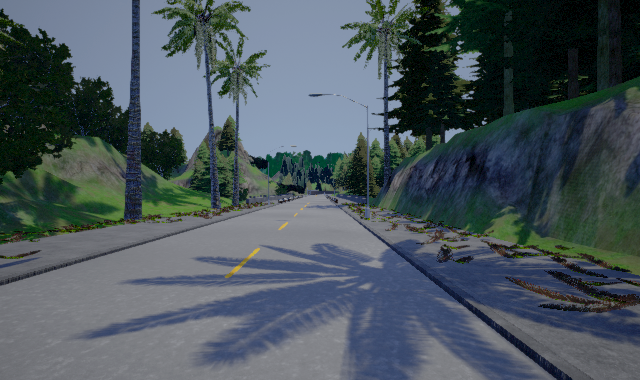

In [3]:
train_image_path = os.path.join(cwd, "images", "train", train_images[idx])
training_img = Image.open(train_image_path)

# Convert to RGB if it has an alpha channel
if training_img.mode == 'RGBA':
    training_img = training_img.convert('RGB')

display(training_img)

In [4]:
test_images = os.listdir("./images/test")
test_labels = os.listdir("./labels/test")

idx = 0
test_image_path = os.path.join(cwd, "images", "test", test_images[idx])
test_label_path = os.path.join(cwd, "labels", "test", test_labels[idx])

print(f"Number of test labels: {len(test_labels)}")
print(f"Number of test images: {len(test_images)}")
print()
print(f"Example of test label name: {test_labels[idx]}")
print(f"Example of test image name: {test_images[idx]}")

Number of test labels: 249
Number of test images: 249

Example of test label name: Town05_001920.xml
Example of test image name: Town05_001920.png


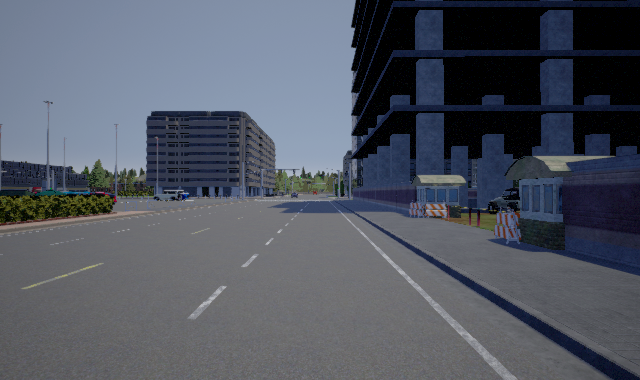

In [5]:
test_image_path = os.path.join(cwd, "images", "test", test_images[idx])
test_img = Image.open(test_image_path)

# Convert to RGB if it has an alpha channel
if test_img.mode == 'RGBA':
    test_img = test_img.convert('RGB')

display(test_img)

## COCO Dataset Format - Overview

## licenses
The licenses section provides details about the licenses of images included in the dataset, so you can understand how you are allowed to use them in your work. Below is an example of license info.

<details>
    <summary>
        See Example:
    </summary>
    

```json
"licenses": [
    {
        "url": "https://creativecommons.org/licenses/by-nc-sa/4.0/",
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike 4.0 International"
    },
    {
        "url": "https://creativecommons.org/licenses/by-nc/4.0/",
        "id": 2,
        "name": "Attribution-NonCommercial 4.0 International"
    }
]
```

In this example, the "licenses" field is an array containing multiple license objects. Each license object has three fields: "url," "id," and "name." The "url" field contains the URL of the license, the "id" field is a unique identifier for the license, and the "name" field contains the name of the license.
</details>

## categories
The "categories" field in the COCO JSON is a list of objects that define the different categories or classes of objects in the dataset. Each object in the list contains the following fields:

* **"id"**: a unique integer identifier for the category
* **"name"**: the name of the category
* **"supercategory"**: an optional field specifying a broader category than the current one

For example, in a COCO dataset of images containing different types of vehicles, the "categories" field might look like this:

<details>
    <summary>
        See Example:
    </summary>

```json
"categories": [
   {
       "id": 1,
       "name": "car",
       "supercategory": "vehicle"
   },
   {
       "id": 2,
       "name": "truck",
       "supercategory": "vehicle"
   }
]
```

## images
The "images" field is an array that contains information about each image in the dataset. Each element in the array is a dictionary that contains the following key-value pairs:

* **"id"**: integer, a unique image id
* **"width"**: integer, the width of the image
* **"height"**: integer, the height of the image
* **"file_name"**: string, the file name of the image
* **"license"**: integer, the license id of the image
* **"flickr_url"**: string, the URL of the image on Flickr (if available)
* **"coco_url"**: string, the URL of the image on the COCO website (if available)
Here is an example of the "images" field in a COCO JSON file:

<details>
    <summary>
        See Example:
    </summary>
    
```json
"images": [
   {
       "id": 1,
       "width": 640,
       "height": 480,
       "file_name": "000000397133.jpg",
       "license": 1,
       "flickr_url": "https://www.flickr.com/photos/adrianrosebrock/397133",
       "coco_url": "http://images.cocodataset.org/val2017/000000397133.jpg",
       "date_captured": "2013-11-14 17:02:52"
   },
   {
       "id": 2,
       "width": 427,
       "height": 240,
       "file_name": "000000037777.jpg",
       "license": 1,
       "flickr_url": "https://www.flickr.com/photos/adrianrosebrock/37777",
       "coco_url": "http://images.cocodataset.org/val2017/000000037777.jpg",
       "date_captured": "2013-11-14 17:02:52"
   },
   ...
]
```
</details>

## segmentation
The segmentation field in the COCO JSON refers to the object instance segmentation masks for an image. The segmentation field is an array of dictionaries, and each dictionary represents a single object instance in the image. Each dictionary contains a "segmentation" key, an array of arrays representing the pixel-wise segmentation mask for that object instance.

<details>
    <summary>
        Example of a segmentation field in COCO JSON:
    </summary>

```json
"annotations": [
   {
       "segmentation": [
           [
               [x1, y1],
               [x2, y2],
               [x3, y3],
               ...
           ]
       ],
       "area": 1000,
       "iscrowd": 0,
       "image_id": 1,
       "bbox": [x, y, width, height],
       "category_id": 1,
       "id": 1
   },
   {
       "segmentation": [
           [
               [x1, y1],
               [x2, y2],
               [x3, y3],
               ...
           ]
       ],
       "area": 800,
       "iscrowd": 0,
       "image_id": 1,
       "bbox": [x, y, width, height],
       "category_id": 2,
       "id": 2
   }
]
```
In this example, the two object instances in the image are represented by a dictionary in the "annotations" array. The "segmentation" key in each dictionary is an array of arrays, where each array represents a set of x and y coordinates that make up the pixel-wise segmentation mask for that object instance.

The other keys in the dictionary provide additional information about the object instance, such as its bounding box, area, and category.
</details>

## annotations
The annotations field in the COCO JSON file is a list of annotation objects that provide detailed information about the objects in an image. Each annotation object contains information such as the object's class label, bounding box coordinates, and segmentation mask.

<details>
<summary>
    See Example:
</summary>

```json
"annotations": [
   {
       "id": 1,
       "image_id": 1,
       "category_id": 1,
       "segmentation": [
           [
               [
                   56.97,
                   56.97
               ],
               [
                   56.97,
                   56.97
               ],
               ...
           ]
       ],
       "area": 2351.45,
       "bbox": [
           56.97,
           56.97,
           56.97,
           56.97
       ],
       "iscrowd": 0
   }
   ...
]
```
</details>

## bbox
The "bbox" field refers to the bounding box coordinates for an object in an image. The bounding box is represented by four values: the x and y coordinates of the top-left corner and the width and height of the box. These values are all normalized, representing them as fractions of the image width and height.

<details>
    <summary>
        Here is an example of the "bbox" field in a COCO JSON file:
    </summary>

```json
{
   "annotations": [
       {
           "id": 1,
           "image_id": 1,
           "category_id": 1,
           "bbox": [0.1, 0.2, 0.3, 0.4],
           "area": 0.12,
           "iscrowd": 0
       },
       {
           "id": 2,
           "image_id": 1,
           "category_id": 2,
           "bbox": [0.5, 0.6, 0.7, 0.8],
           "area": 0.42,
           "iscrowd": 0
       }
   ]
}
```

In this example, the first annotation has a bounding box with the top-left corner at (0.1, 0.2) and a width and height of 0.3 and 0.4, respectively. The second annotation has a bounding box with the top-left corner at (0.5, 0.6) and a width and height of 0.7 and 0.8, respectively.
</details>

## Extracting Data in COCO Dataset Format

### Mapping between class labels and class label index

In [6]:
label2idx = {}

with open("labels.txt", "rb") as file:
    for line_number, line in enumerate(file, start=1):
        # 'start=1' ensures line numbers are 1-indexed
        line = line.decode('utf-8').strip()
        if line == "motobike":
            line = "motorbike"
        elif line == "vehicle":
            line = "automobile"
        label2idx[line] = line_number

idx2label = {v: k for k, v in label2idx.items()}
label2idx

{'automobile': 1,
 'bike': 2,
 'motorbike': 3,
 'traffic_light': 4,
 'traffic_sign': 5}

### Initialise COCO Dataset

In [7]:
# Initialize COCO data structure
coco_train_data = {
    "info": {
        "year": datetime.utcnow().year,
        "version": "2.0",
        "description": "COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)",
        "contributor": "DanielHfnr, yunusskeete",
        "url": "https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset",
        "date_created": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    },
    "images": [],
    "annotations": [],
    "categories": [{"id": k, "name": v, "supercategory": "traffic_control" if "traffic" in v else "vehicle"} for k, v in idx2label.items()],
    "licenses": [
        {
            "url": "https://opensource.org/license/mit/",
            "id": 1,
            "name": "MIT License"
        }
    ]
}
coco_train_data

{'info': {'year': 2023,
  'version': '2.0',
  'description': 'COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)',
  'contributor': 'DanielHfnr, yunusskeete',
  'url': 'https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset',
  'date_created': '2023-11-29 18:20:47'},
 'images': [],
 'annotations': [],
 'categories': [{'id': 1, 'name': 'automobile', 'supercategory': 'vehicle'},
  {'id': 2, 'name': 'bike', 'supercategory': 'vehicle'},
  {'id': 3, 'name': 'motorbike', 'supercategory': 'vehicle'},
  {'id': 4, 'name': 'traffic_light', 'supercategory': 'traffic_control'},
  {'id': 5, 'name': 'traffic_sign', 'supercategory': 'traffic_control'}],
 'licenses': [{'url': 'https://opensource.org/license/mit/',
   'id': 1,
   'name': 'MIT License'}]}

## Extract Data from XML Format

In [8]:
from typing import List, Tuple, Any
from datetime import datetime

def xml_to_coco(
        xml_file: str,
        train: bool,
        license: int = 1,
        date_captured: str = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
) -> Tuple[dict[str, Any], List[dict[str, Any]]]:
    base_url = "https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset/blob/master/images/" + ("train/" if train else "test/")

    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    annotations = []

    file_name = root.find("filename").text
    # start_idx = file_name.find("_") + 1
    end_idx = file_name.find(".")
    image_id = file_name[:end_idx]

    # Extract image information
    width = int(root.find("size/width").text)
    height = int(root.find("size/height").text)

    image_info = {
        "id": image_id,
        "width": width,
        "height": height,
        "file_name": file_name,
        "license": license,
        "url": base_url + file_name,
        "date_captured": date_captured
    }

    # Extract object annotations
    for annotation_id, obj in enumerate(root.findall("object"), 1):
        category_name = obj.find("name").text
        if category_name == "motobike":
            category_name = "motorbike"
        elif category_name == "vehicle":
            category_name = "automobile"
        category_id = label2idx[category_name]

        x_min, y_min, x_max, y_max = int(obj.find("bndbox/xmin").text), int(obj.find("bndbox/ymin").text), int(obj.find("bndbox/xmax").text), int(obj.find("bndbox/ymax").text)
        abs_width, abs_height = (x_max - x_min), (y_max - y_min)

        bbox = [
            x_min,
            y_min,
            abs_width,
            abs_height
        ]

        annotation_info = {
            "id": annotation_id,
            "image_id": image_id,
            "category_id": category_id,
            "bbox": bbox,
            "area": abs_width * abs_height,
            "iscrowd": 0,
            "segmentation": [],
        }
        annotations.append(annotation_info)

    return (image_info, annotations)

### Example:

In [9]:
# Generate example
train_label = "Town01_011940.xml"
train_label_path = os.path.join(cwd, "labels", "train", train_label)
image, annotations = xml_to_coco(train_label_path, True)

In [10]:
image

{'id': 'Town01_011940',
 'width': 640,
 'height': 380,
 'file_name': 'Town01_011940.png',
 'license': 1,
 'url': 'https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset/blob/master/images/train/Town01_011940.png',
 'date_captured': '2023-11-29 18:20:47'}

In [11]:
annotations

[{'id': 1,
  'image_id': 'Town01_011940',
  'category_id': 3,
  'bbox': [566, 202, 42, 22],
  'area': 924,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 2,
  'image_id': 'Town01_011940',
  'category_id': 1,
  'bbox': [203, 182, 68, 50],
  'area': 3400,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 3,
  'image_id': 'Town01_011940',
  'category_id': 4,
  'bbox': [528, 43, 51, 125],
  'area': 6375,
  'iscrowd': 0,
  'segmentation': []}]

### Annotate and Display Images

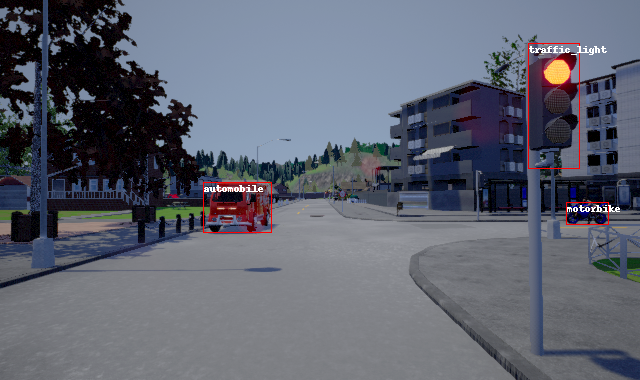

In [12]:
from typing import List, Dict, Any
from PIL import ImageDraw

train_image_path = os.path.join(cwd, "images", "train", image['file_name'])
img = Image.open(train_image_path)

def draw_bboxes(img: PIL.Image, annotations: List[Dict[str, Any]]) -> PIL.Image:
    # Convert to RGB if it has an alpha channel
    if img.mode == 'RGBA':
        img = img.convert('RGB')

    draw = ImageDraw.Draw(img)

    for annotation in annotations:
        x_min, y_min, abs_width, abs_height = annotation["bbox"]
        class_idx = annotation["category_id"]
        draw.rectangle(
            (
                x_min,
                y_min,
                x_min + abs_width,
                y_min + abs_height
            ),
            outline="red",
            width=1
        )
        draw.text((x_min + 1, y_min + 1), idx2label[class_idx], fill="white")

    return img

demo_img = draw_bboxes(img, annotations)
demo_img.save(f"{train_label.split('.')[0]}_annotated.png")
demo_img

### Generate Training Data

In [13]:
coco_train_data = {
    "info": {
        "year": datetime.utcnow().year,
        "version": "2.0",
        "description": "COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)",
        "contributor": "DanielHfnr, yunusskeete",
        "url": "https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset",
        "date_created": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    },
    "images": [],
    "annotations": [],
    "categories": [{"id": k, "name": v, "supercategory": "traffic_control" if "traffic" in v else "vehicle"} for k, v in idx2label.items()],
    "licenses": [
        {
            "url": "https://opensource.org/license/mit/",
            "id": 1,
            "name": "MIT License"
        }
    ]
}

train_labels = os.listdir("./labels/train")
for train_label in train_labels:
    train_label_path = os.path.join(cwd, "labels", "train", train_label)

    image, annotations = xml_to_coco(train_label_path, True)

    coco_train_data["images"].append(image)
    coco_train_data["annotations"].extend(annotations)

# Save COCO data to a JSON file
with open("train.json", "w") as json_file:
    json.dump(coco_train_data, json_file, indent=4)

### Generate Test Data

In [14]:
coco_test_data = {
    "info": {
        "year": datetime.utcnow().year,
        "version": "2.0",
        "description": "COCO format of Carla Object Detection Dataset by DanielHfnr (https://github.com/DanielHfnr)",
        "contributor": "DanielHfnr, yunusskeete",
        "url": "https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset",
        "date_created": datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
    },
    "images": [],
    "annotations": [],
    "categories": [{"id": k, "name": v, "supercategory": "traffic_control" if "traffic" in v else "vehicle"} for k, v in idx2label.items()],
    "licenses": [
        {
            "url": "https://opensource.org/license/mit/",
            "id": 1,
            "name": "MIT License"
        }
    ]
}

test_labels = os.listdir("./labels/test")
for test_label in test_labels:
    test_label_path = os.path.join(cwd, "labels", "test", test_label)

    image, annotations = xml_to_coco(test_label_path, False)

    coco_test_data["images"].append(image)
    coco_test_data["annotations"].extend(annotations)

# Save COCO data to a JSON file
with open("test.json", "w") as json_file:
    json.dump(coco_test_data, json_file, indent=4)

## Visualise:

In [15]:
coco_train_data.keys()

dict_keys(['info', 'images', 'annotations', 'categories', 'licenses'])

In [16]:
coco_train_data["images"]

[{'id': 'Town01_001020',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001020.png',
  'license': 1,
  'url': 'https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset/blob/master/images/train/Town01_001020.png',
  'date_captured': '2023-11-29 18:20:47'},
 {'id': 'Town01_001080',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001080.png',
  'license': 1,
  'url': 'https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset/blob/master/images/train/Town01_001080.png',
  'date_captured': '2023-11-29 18:20:47'},
 {'id': 'Town01_001140',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001140.png',
  'license': 1,
  'url': 'https://github.com/yunusskeete/Carla-COCO-Object-Detection-Dataset/blob/master/images/train/Town01_001140.png',
  'date_captured': '2023-11-29 18:20:47'},
 {'id': 'Town01_001200',
  'width': 640,
  'height': 380,
  'file_name': 'Town01_001200.png',
  'license': 1,
  'url': 'https://github.com/yunusskeete/Carla-COCO-Object-Detect

In [17]:
coco_train_data["annotations"]

[{'id': 1,
  'image_id': 'Town01_001440',
  'category_id': 5,
  'bbox': [384, 176, 18, 18],
  'area': 324,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001500',
  'category_id': 5,
  'bbox': [386, 176, 19, 18],
  'area': 342,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001620',
  'category_id': 4,
  'bbox': [362, 162, 5, 24],
  'area': 120,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001680',
  'category_id': 3,
  'bbox': [43, 201, 115, 103],
  'area': 11845,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001740',
  'category_id': 1,
  'bbox': [241, 181, 46, 37],
  'area': 1702,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 2,
  'image_id': 'Town01_001740',
  'category_id': 1,
  'bbox': [314, 193, 10, 8],
  'area': 80,
  'iscrowd': 0,
  'segmentation': []},
 {'id': 1,
  'image_id': 'Town01_001800',
  'category_id': 1,
  'bbox': [310, 191, 20, 19],
  'area': 380,
  'iscrowd': 0,


In [18]:
coco_train_data["categories"]

[{'id': 1, 'name': 'automobile', 'supercategory': 'vehicle'},
 {'id': 2, 'name': 'bike', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'motorbike', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'traffic_light', 'supercategory': 'traffic_control'},
 {'id': 5, 'name': 'traffic_sign', 'supercategory': 'traffic_control'}]

In [19]:
print(f"Number of training images: {len(coco_train_data['images'])}")
print(f"Number of training annotations: {len(coco_train_data['annotations'])}")

Number of training images: 779
Number of training annotations: 2556


image id: Town01_008820


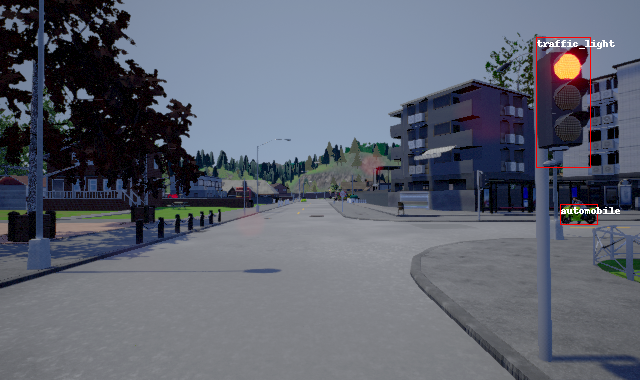

image id: Town03_017180


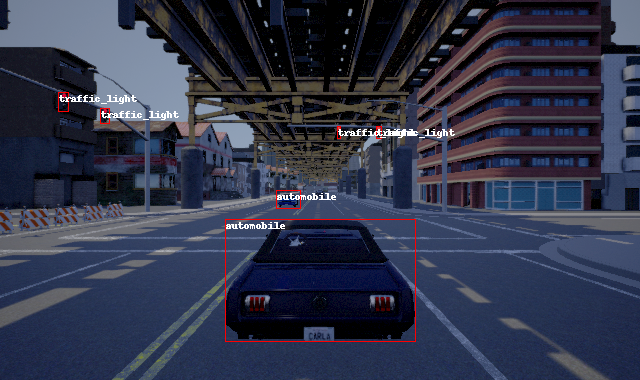

image id: Town02_009720


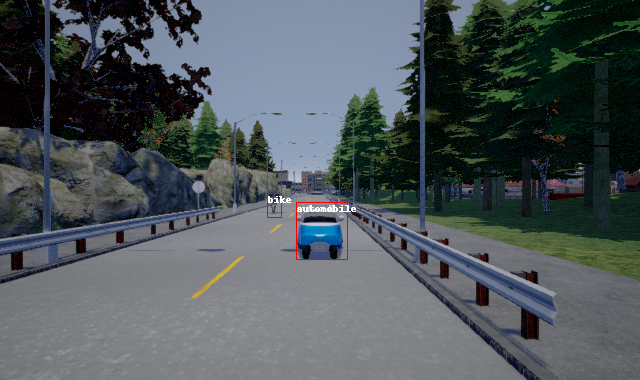

image id: Town02_009960


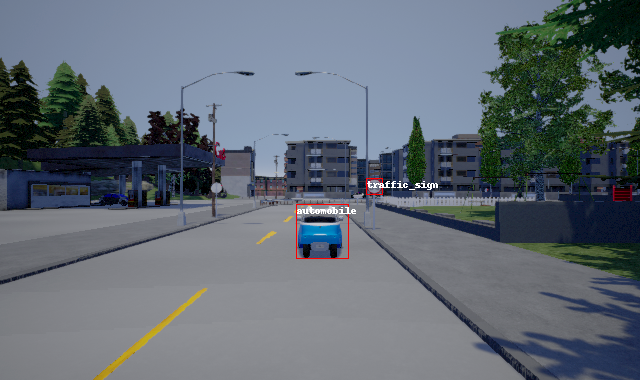

image id: Town01_008520


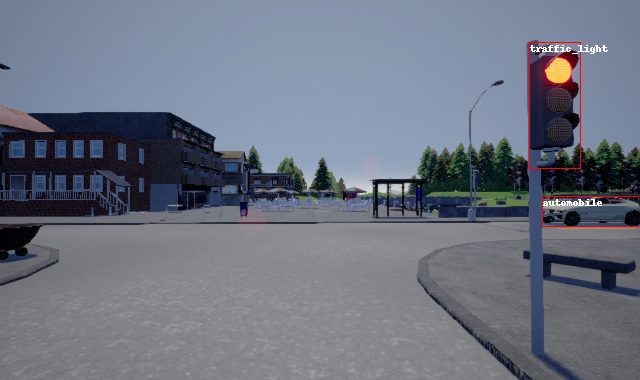

image id: Town03_017140


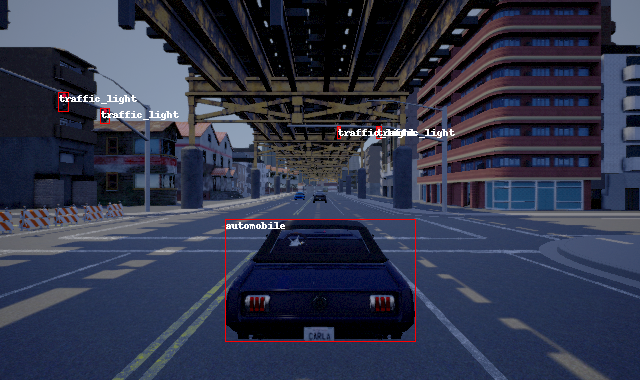

image id: Town03_018600


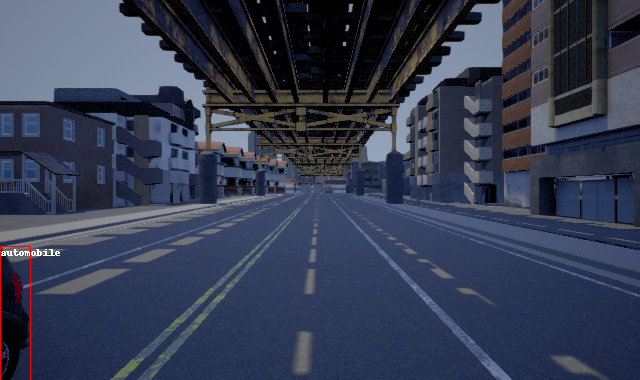

image id: Town03_018840


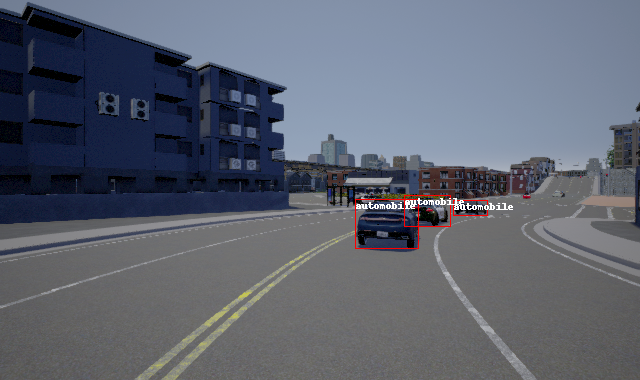

image id: Town03_014880


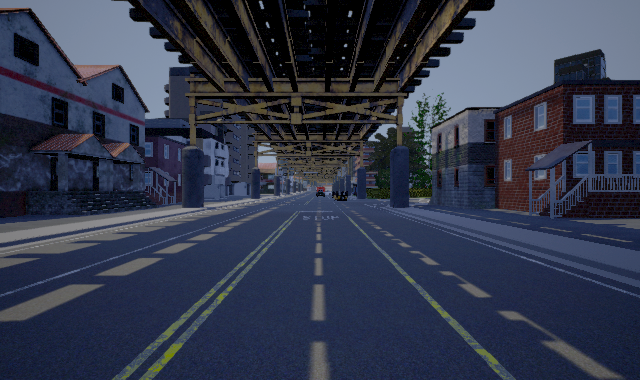

image id: Town03_015000


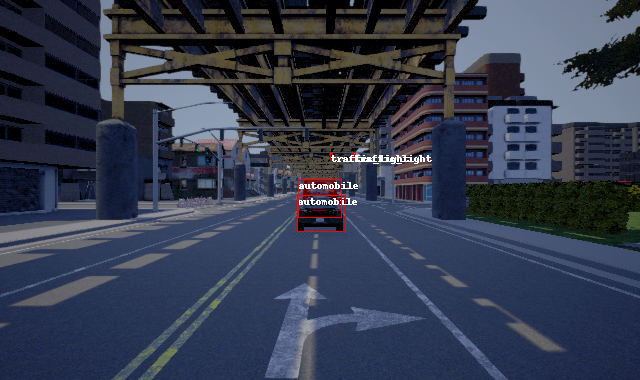

In [20]:
for image in random.choices(coco_train_data["images"], k=10):
    print(f"image id: {image['id']}")
    annotations = [annotation for annotation in coco_train_data["annotations"] if annotation["image_id"] == image["id"]]

    train_image_path = os.path.join(cwd, "images", "train", image['file_name'])
    img = Image.open(train_image_path)

    display(draw_bboxes(img, annotations))